## Importing 

In [1]:
from scipy.io import loadmat

# Load MATLAB .mat file
mat_data = loadmat('Matlab data set.mat')

# Access variables in the loaded data 
strokeLengths = mat_data['strokeLengths']
rotationAngles = mat_data['rotationAngles']
gearRadii = mat_data['gearRadii']
pinRadii = mat_data['pinRadii']
crossShears = mat_data['crossShears']

## Verification 

### See Sections 2.3 & 3 from the article. 

28/30 with pin radii of 2, 2.5, 3.5 and 5 mm 


10/10, 12/15 and 26/45 with a pin radius of 2 mm. 

<IPython.core.display.Javascript object>


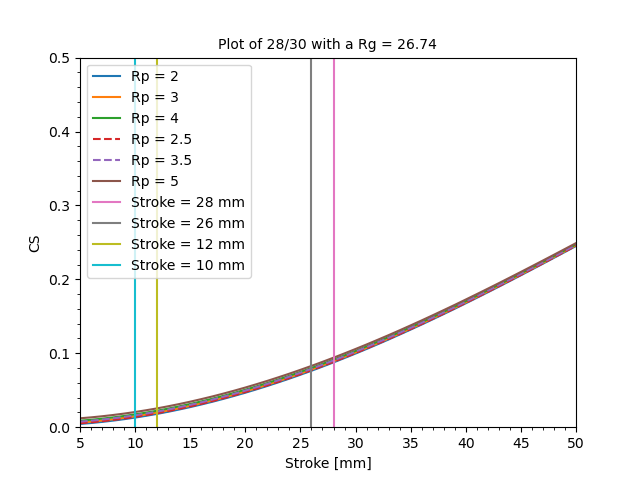

<IPython.core.display.Javascript object>


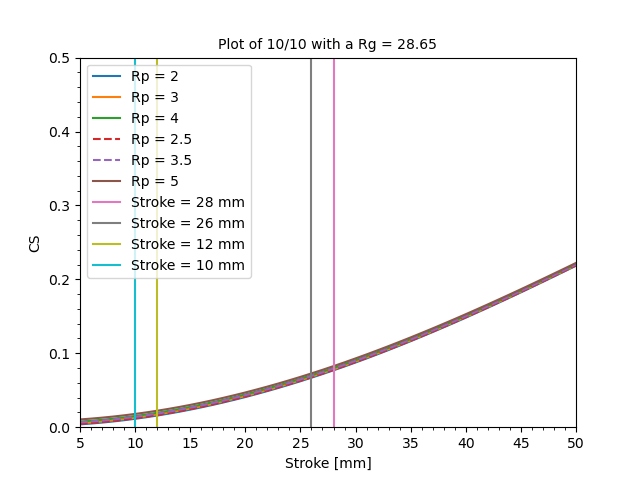

<IPython.core.display.Javascript object>


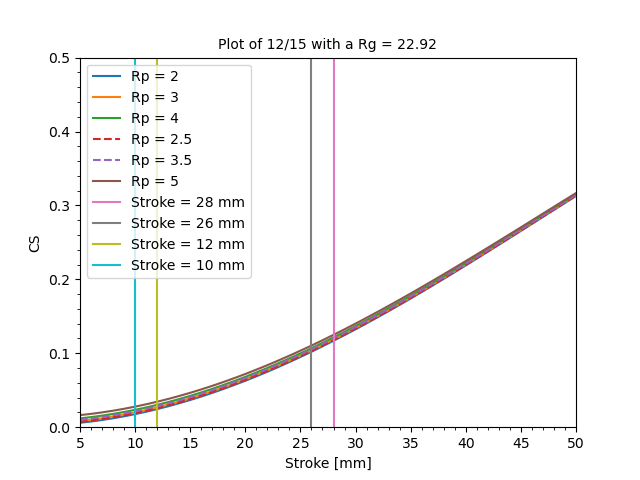

<IPython.core.display.Javascript object>


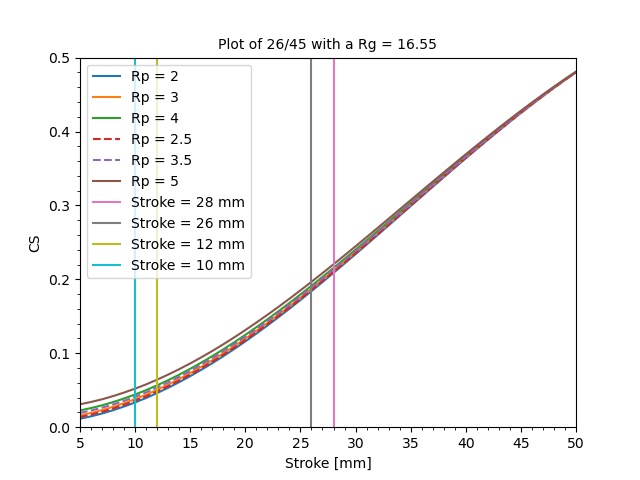

In [3]:
from scipy.interpolate import griddata 
from scipy.interpolate import interp1d
import numpy as np
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

def gear_radius(x,theta): # x = stroke(mm), theta = ± rotation angle(deg)
    ans = ((360/(2*np.pi*theta))*0.5*x)
    return np.round(ans,2)

##########################################################################

gear_list = [gear_radius(28,30),gear_radius(10,10),gear_radius(12,15),gear_radius(26,45)]

figure_names_dict = {
    gear_radius(28,30): '28/30',
    gear_radius(10,10): '10/10',
    gear_radius(12,15): '12/15',
    gear_radius(26,45): '26/45'}

int_method = 'linear' # interpolation method can be changed

##########################################################################


for gear_radius_input in gear_list: 
    figure_name = figure_names_dict.get(gear_radius_input)
    fig, ax = plt.subplots()
    
    for i in [0,1,2,3] : 
        stroke_values_int = strokeLengths[0, :, i]
        gear_radius = gear_radius_input*np.ones(len(stroke_values_int))

        x = np.squeeze(strokeLengths[:, :, i])
        y = np.squeeze(gearRadii[:, :, i])
        z = np.squeeze(crossShears[:, :, i])

        # Determine the range of x and y values
        x_min, x_max = np.min(stroke_values_int), np.max(stroke_values_int)
        y_min, y_max = np.min(gear_radius), np.max(gear_radius)

        # Define the number of points for interpolation
        num_points_x = x.shape[1]
        num_points_y = y.shape[0]

        # Create meshgrid based on the range and number of points
        xi, yi = np.meshgrid(np.linspace(x_min, x_max, num_points_x), np.linspace(y_min, y_max, num_points_y))

        # Perform interpolation
        interp_CS = griddata((x.flatten(), y.flatten()), z.flatten(), (xi, yi), method=int_method)

        # Plotting 
        ax.plot(np.linspace(x_min, x_max, num_points_x),interp_CS[0,:], label = 'Rp = {}'.format(i+2))

        # Labels
        ax.set_xlabel('Stroke [mm]',fontsize = 10)
        ax.set_ylabel('CS',fontsize = 10)
            
        if i == 0: 
            interp_CS_Rp2 = interp_CS[0, :]
        if i == 1: 
            interp_CS_Rp3 = interp_CS[0, :]
        if i == 2:
            interp_CS_Rp4 = interp_CS[0, :]
            
            # Interpolate for Rp value of 2.5
            Rg_interp = 2.5
            interp_func = interp1d([2, 3], [interp_CS_Rp2, interp_CS_Rp3], axis=0, kind='linear')
            interp_value = interp_func(Rg_interp)
            ax.plot(np.linspace(x_min, x_max, num_points_x), interp_value, linestyle='--', label='Rp = {}'.format(Rg_interp))
            
            # Interpolate for Rp value of 3.5
            Rg_interp = 3.5
            interp_func = interp1d([3, 4], [interp_CS_Rp3, interp_CS_Rp4], axis=0, kind='linear')
            interp_value = interp_func(Rg_interp)
            ax.plot(np.linspace(x_min, x_max, num_points_x), interp_value, linestyle='--', label='Rp = {}'.format(Rg_interp))

    ax.plot([28,28],[0,0.5], label ="Stroke = 28 mm")
    ax.plot([26,26],[0,0.5], label ="Stroke = 26 mm")
    ax.plot([12,12],[0,0.5], label ="Stroke = 12 mm")
    ax.plot([10,10],[0,0.5], label ="Stroke = 10 mm")
    
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.set_xlim([5, 50]);
    ax.set_ylim([0,0.5])

    plt.title("Plot of {} with a Rg = {}".format(figure_name, gear_radius_input), fontsize=10)
    ax.legend(fontsize = 10)
    plt.show()

## Standard gear radius plots as found in publication with Illustative example case

### See Sections 4 & 5 from the article.

<IPython.core.display.Javascript object>


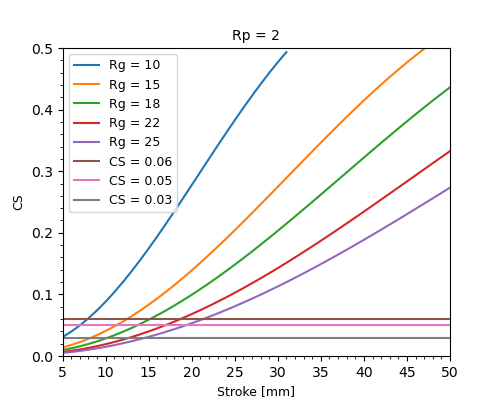

Critical Stroke length =  31.42 mm, for Rg = 10 mm
Critical Stroke length =  47.12 mm, for Rg = 15 mm
Critical Stroke length =  56.55 mm, for Rg = 18 mm
Critical Stroke length =  69.12 mm, for Rg = 22 mm
Critical Stroke length =  78.54 mm, for Rg = 25 mm


<IPython.core.display.Javascript object>


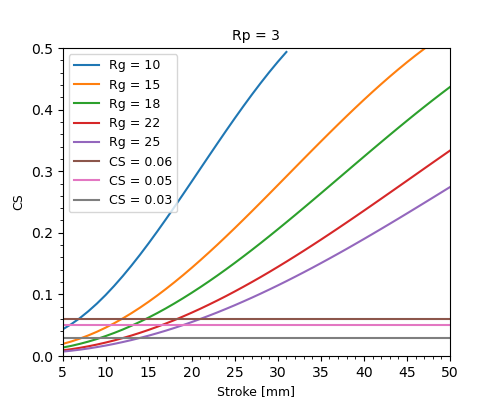

Critical Stroke length =  31.42 mm, for Rg = 10 mm
Critical Stroke length =  47.12 mm, for Rg = 15 mm
Critical Stroke length =  56.55 mm, for Rg = 18 mm
Critical Stroke length =  69.12 mm, for Rg = 22 mm
Critical Stroke length =  78.54 mm, for Rg = 25 mm


<IPython.core.display.Javascript object>


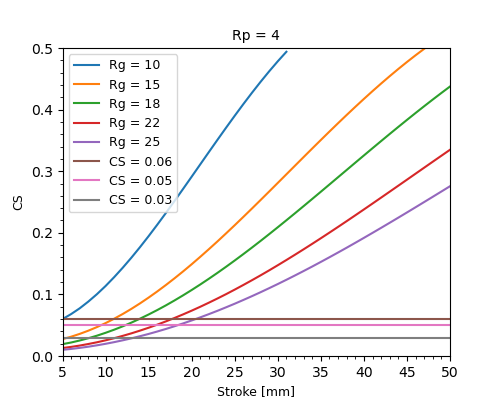

Critical Stroke length =  31.42 mm, for Rg = 10 mm
Critical Stroke length =  47.12 mm, for Rg = 15 mm
Critical Stroke length =  56.55 mm, for Rg = 18 mm
Critical Stroke length =  69.12 mm, for Rg = 22 mm
Critical Stroke length =  78.54 mm, for Rg = 25 mm


<IPython.core.display.Javascript object>


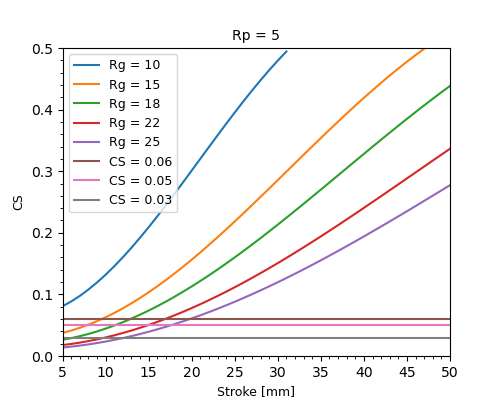

Critical Stroke length =  31.42 mm, for Rg = 10 mm
Critical Stroke length =  47.12 mm, for Rg = 15 mm
Critical Stroke length =  56.55 mm, for Rg = 18 mm
Critical Stroke length =  69.12 mm, for Rg = 22 mm
Critical Stroke length =  78.54 mm, for Rg = 25 mm


<IPython.core.display.Javascript object>


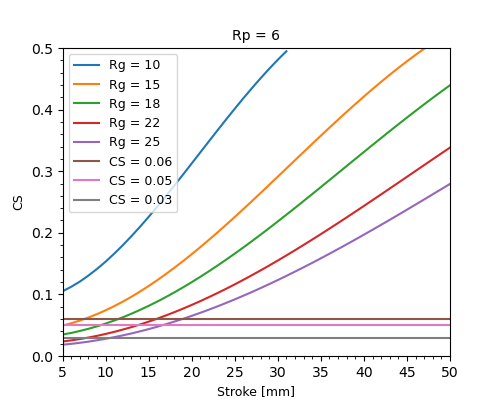

Critical Stroke length =  31.42 mm, for Rg = 10 mm
Critical Stroke length =  47.12 mm, for Rg = 15 mm
Critical Stroke length =  56.55 mm, for Rg = 18 mm
Critical Stroke length =  69.12 mm, for Rg = 22 mm
Critical Stroke length =  78.54 mm, for Rg = 25 mm


<IPython.core.display.Javascript object>


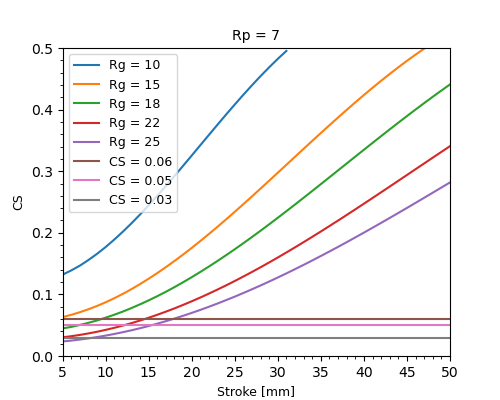

Critical Stroke length =  31.42 mm, for Rg = 10 mm
Critical Stroke length =  47.12 mm, for Rg = 15 mm
Critical Stroke length =  56.55 mm, for Rg = 18 mm
Critical Stroke length =  69.12 mm, for Rg = 22 mm
Critical Stroke length =  78.54 mm, for Rg = 25 mm


<IPython.core.display.Javascript object>


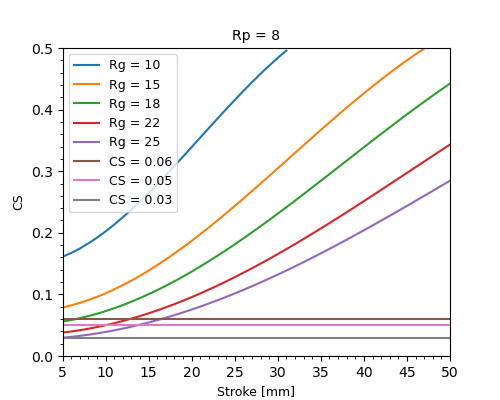

Critical Stroke length =  31.42 mm, for Rg = 10 mm
Critical Stroke length =  47.12 mm, for Rg = 15 mm
Critical Stroke length =  56.55 mm, for Rg = 18 mm
Critical Stroke length =  69.12 mm, for Rg = 22 mm
Critical Stroke length =  78.54 mm, for Rg = 25 mm


<IPython.core.display.Javascript object>


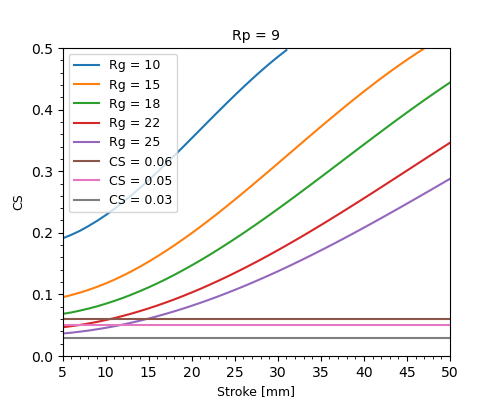

Critical Stroke length =  31.42 mm, for Rg = 10 mm
Critical Stroke length =  47.12 mm, for Rg = 15 mm
Critical Stroke length =  56.55 mm, for Rg = 18 mm
Critical Stroke length =  69.12 mm, for Rg = 22 mm
Critical Stroke length =  78.54 mm, for Rg = 25 mm


<IPython.core.display.Javascript object>


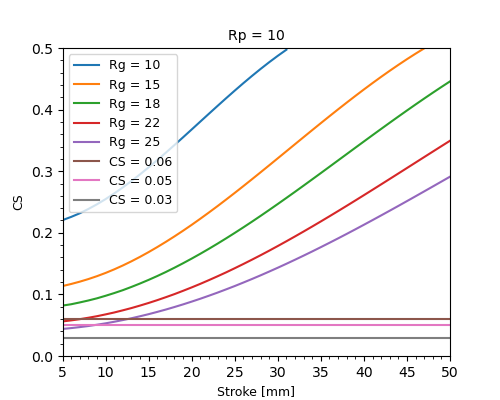

Critical Stroke length =  31.42 mm, for Rg = 10 mm
Critical Stroke length =  47.12 mm, for Rg = 15 mm
Critical Stroke length =  56.55 mm, for Rg = 18 mm
Critical Stroke length =  69.12 mm, for Rg = 22 mm
Critical Stroke length =  78.54 mm, for Rg = 25 mm


In [4]:
from scipy.interpolate import griddata 
import numpy as np
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from matplotlib.ticker import AutoMinorLocator
##########################################################################

gear_radius_input = [10,15,18,22,25] # Range: 2-50 mm 

int_method = 'linear'

##########################################################################

for i in range(0,9):
    fig, ax = plt.subplots(figsize=(5, 4))
    for r in gear_radius_input:
        stroke_values_int = strokeLengths[0, :, i]
        gear_radius = r*np.ones(len(stroke_values_int))

        x = np.squeeze(strokeLengths[:, :, i])
        y = np.squeeze(gearRadii[:, :, i])
        z = np.squeeze(crossShears[:, :, i])

        # Determine the range of x and y values
        x_min, x_max = np.min(stroke_values_int), np.max(stroke_values_int)
        y_min, y_max = np.min(gear_radius), np.max(gear_radius)

        # Define the number of points for interpolation
        num_points_x = x.shape[1]
        num_points_y = y.shape[0]

        # Create meshgrid based on the range and number of points
        xi, yi = np.meshgrid(np.linspace(x_min, x_max, num_points_x), np.linspace(y_min, y_max, num_points_y))

        # Perform interpolation
        interp_CS = griddata((x.flatten(), y.flatten()), z.flatten(), (xi, yi), method=int_method)

        # Plotting 
        ax.plot(np.linspace(x_min, x_max, num_points_x),interp_CS[0], label = 'Rg = {}'.format(r), linestyle='-');
  
        # Labels
        ax.set_xlabel('Stroke [mm]',fontsize = 9)
        ax.set_ylabel('CS',fontsize = 9)
        
        print("Critical Stroke length = ", np.round((((2*np.pi*r)/360)*2*90),2), "mm, for Rg =",r, "mm")
        

    ax.yaxis.set_minor_locator(AutoMinorLocator());
    ax.xaxis.set_minor_locator(AutoMinorLocator());
    ax.set_xlim([5, 50]);
    ax.set_ylim([0, 0.5]);
    
    #Illustative Example 
    ax.plot([5,50],[0.06,0.06], label ="CS = 0.06")
    ax.plot([5,50],[0.05,0.05], label ="CS = 0.05")
    ax.plot([5,50],[0.03,0.03], label ="CS = 0.03")
    
    ax.legend(fontsize = 9)
    plt.title("Rp = {}".format(i+2), fontsize = 10)
    plt.show()

## Alternative plots

### Enter any gear radius within range as input

<IPython.core.display.Javascript object>


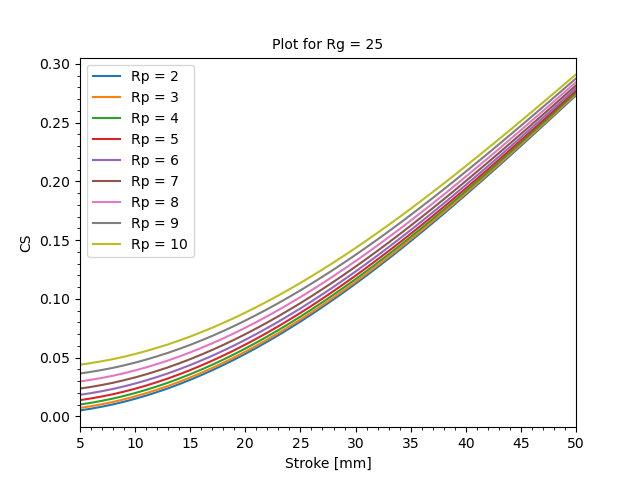

Critical Stroke length =  78.54 mm


In [4]:
from scipy.interpolate import griddata 
import numpy as np
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from matplotlib.ticker import AutoMinorLocator
##########################################################################

gear_radius_input = 25 # Range: 2-50 (mm)

int_method = 'linear' # interpolation method can be changed

##########################################################################

fig, ax = plt.subplots()

for i in range(0,9) : 
    stroke_values_int = strokeLengths[0, :, i]
    gear_radius = gear_radius_input*np.ones(len(stroke_values_int))

    x = np.squeeze(strokeLengths[:, :, i])
    y = np.squeeze(gearRadii[:, :, i])
    z = np.squeeze(crossShears[:, :, i])

    # Determine the range of x and y values
    x_min, x_max = np.min(stroke_values_int), np.max(stroke_values_int)
    y_min, y_max = np.min(gear_radius), np.max(gear_radius)

    # Define the number of points for interpolation
    num_points_x = x.shape[1]
    num_points_y = y.shape[0]

    # Create meshgrid based on the range and number of points
    xi, yi = np.meshgrid(np.linspace(x_min, x_max, num_points_x), np.linspace(y_min, y_max, num_points_y))

    # Perform interpolation
    interp_CS = griddata((x.flatten(), y.flatten()), z.flatten(), (xi, yi), method=int_method)
    
    # Plotting 
    ax.plot(np.linspace(x_min, x_max, num_points_x),interp_CS[0], label = 'Rp = {}'.format(i+2));
    
    # Labels
    ax.set_xlabel('Stroke [mm]',fontsize = 10)
    ax.set_ylabel('CS',fontsize = 10)

ax.yaxis.set_minor_locator(AutoMinorLocator());
ax.xaxis.set_minor_locator(AutoMinorLocator());
ax.set_xlim([5, 50]);

plt.title("Plot for Rg = {}".format(gear_radius_input), fontsize = 10)

ax.legend(fontsize = 10)
plt.show()

print("Critical Stroke length = ", np.round((((2*np.pi*gear_radius_input)/360)*2*90),2), "mm")